<a href="https://colab.research.google.com/github/himanshu9178/Hand_Digit_Recognition_using_CNN/blob/main/Hand_Digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
mnist=tf.keras.datasets.mnist

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


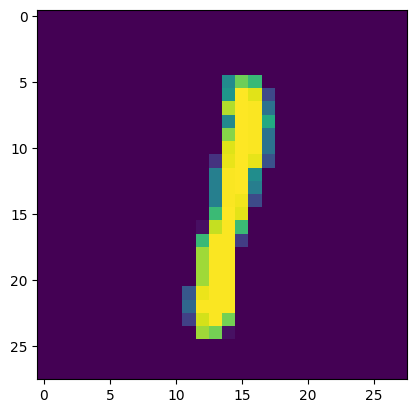

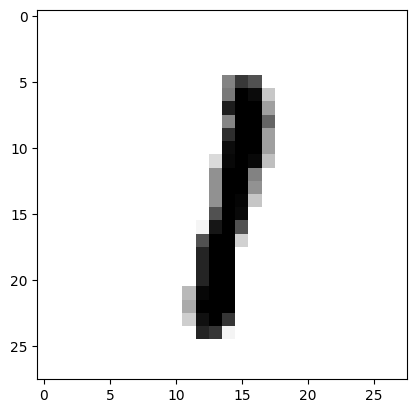

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1200])
plt.show()
plt.imshow(x_train[1200],cmap=plt.cm.binary)

In [6]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

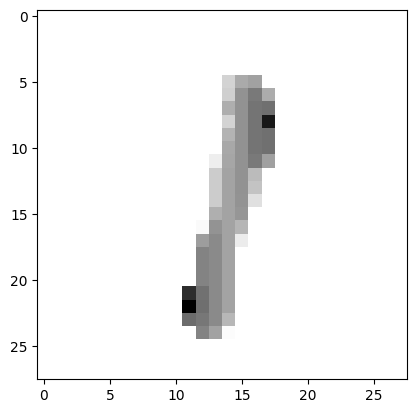

In [7]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[1200],cmap=plt.cm.binary)

In [8]:
print(x_train[1200])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [9]:
print(x_test[1200])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [10]:
print(y_train[1200])

1


In [11]:
import numpy as np
img_size=28
x_train=np.array(x_train).reshape(-1,img_size,img_size,1)
x_test=np.array(x_test).reshape(-1,img_size,img_size,1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

In [13]:
model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(32))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [15]:
print(len(x_train))

60000


In [16]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
model.fit(x_train,y_train,epochs=5,validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 89s 67ms/step - loss: 0.3366 - accuracy: 0.8950 - val_loss: 0.1203 - val_accuracy: 0.9632
Epoch 2/5
1313/1313 [==============================] - 86s 66ms/step - loss: 0.1056 - accuracy: 0.9671 - val_loss: 0.0936 - val_accuracy: 0.9702
Epoch 3/5
1313/1313 [==============================] - 81s 62ms/step - loss: 0.0779 - accuracy: 0.9769 - val_loss: 0.0859 - val_accuracy: 0.9744
Epoch 4/5
1313/1313 [==============================] - 84s 64ms/step - loss: 0.0610 - accuracy: 0.9812 - val_loss: 0.0905 - val_accuracy: 0.9733
Epoch 5/5
1313/1313 [==============================] - 80s 61ms/step - loss: 0.0467 - accuracy: 0.9850 - val_loss: 0.0841 - val_accuracy: 0.9753


In [18]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print(test_loss)
print(test_acc)

313/313 [==============================] - 4s 13ms/step - loss: 0.0745 - accuracy: 0.9777
0.07451195269823074
0.9776999950408936


In [19]:
prediction=model.predict([x_test])
prediction

313/313 [==============================] - 6s 20ms/step


array([[1.50813095e-04, 1.24157791e-03, 7.90037157e-05, ...,
        9.98009443e-01, 1.35329273e-07, 1.10113569e-05],
       [9.01735330e-05, 9.46706350e-05, 9.99760151e-01, ...,
        1.59316241e-05, 3.31145457e-05, 2.16642775e-07],
       [3.76871390e-06, 9.99971807e-01, 1.22829465e-06, ...,
        3.04523792e-06, 4.01001171e-06, 1.79373799e-07],
       ...,
       [1.33029410e-08, 6.09060066e-07, 1.86758626e-08, ...,
        1.12511344e-07, 2.00406907e-06, 4.47957291e-06],
       [1.83979919e-05, 4.12280588e-06, 8.67476672e-07, ...,
        1.84107947e-08, 1.68188754e-03, 5.30782381e-05],
       [8.90722149e-05, 1.69043037e-08, 1.35714674e-06, ...,
        5.53133928e-10, 2.42761053e-06, 3.02826311e-06]], dtype=float32)

In [20]:
print(np.argmax(prediction[1200]))

8


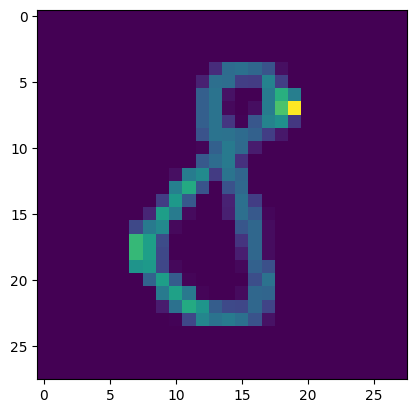

In [21]:
plt.imshow(x_test[1200])

In [61]:
import cv2

In [71]:
img=cv2.imread('/content/drive/MyDrive/Colab Notebooks/new_digits/new_digit_six.png')

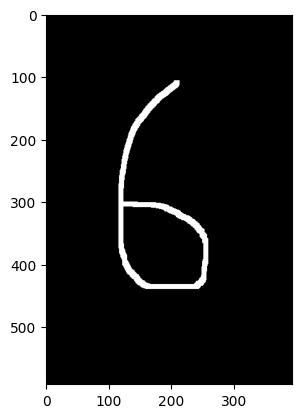

In [72]:
plt.imshow(img)

In [73]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
resized=cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)

In [74]:
print(img.shape)
print(gray.shape)
print(resized.shape)

(592, 394, 3)
(592, 394)
(28, 28)


In [75]:
newimg=tf.keras.utils.normalize(resized,axis=1)

In [76]:
newimg=np.array(newimg).reshape(-1,img_size,img_size,1)

In [77]:
newimg.shape

(1, 28, 28, 1)

In [78]:
predictions=model.predict(newimg)

1/1 [==============================] - 0s 31ms/step


In [79]:
print(np.argmax(predictions))

6


In [80]:
y_pred=[np.argmax(p) for p in prediction]

In [82]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm=confusion_matrix(y_test, y_pred)

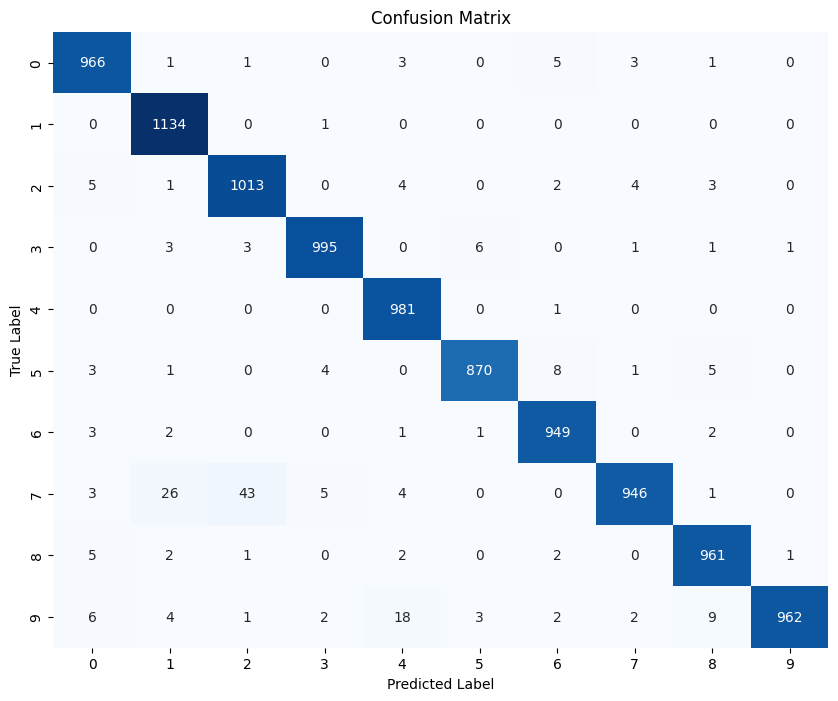

In [83]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
